<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/d)_DB_Scan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install PyCaret
!pip install pycaret -q

# Import necessary libraries
import pandas as pd
from pycaret.clustering import *
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.7 MB/s eta 0:00:00
   ━━

In [2]:
# Generate synthetic data for clustering
from sklearn.datasets import make_blobs

# Generate dataset
data, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.75, random_state=42)
data = pd.DataFrame(data, columns=["Feature_1", "Feature_2"])

# Display first few rows
print("Dataset Loaded Successfully:")
data.head()

Dataset Loaded Successfully:


,Feature_1,Feature_2
0,-1.094558,9.145219
1,0.913361,5.019267
2,-2.352550,7.544534
3,4.472282,2.508670
4,-3.505337,9.161932


In [3]:
# PyCaret setup for clustering
cluster_setup = setup(data, normalize=True, session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(300, 2)"
2,Transformed data shape,"(300, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [4]:
# Train DBSCAN model
dbscan_model = create_model('dbscan')

# View the cluster assignment
data_with_clusters = assign_model(dbscan_model)
data_with_clusters.head()


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7337,1136.3556,0.4275,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Feature_1,Feature_2,Cluster
0,-1.094558,9.145220,Cluster 0
1,0.913361,5.019267,Cluster 1
2,-2.352550,7.544534,Cluster 0
3,4.472282,2.508670,Cluster 1
4,-3.505337,9.161932,Cluster 0


In [5]:
evaluate_model(dbscan_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

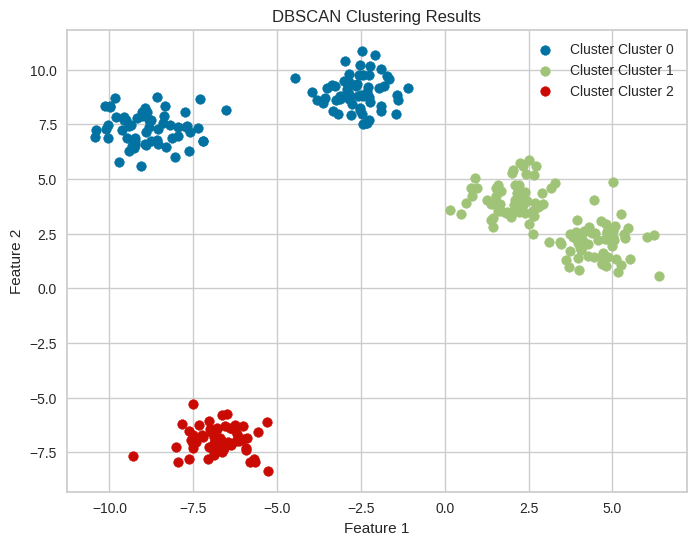

In [6]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    plt.scatter(cluster_data['Feature_1'], cluster_data['Feature_2'], label=f"Cluster {cluster}")

plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [7]:
# Evaluate clustering quality
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
labels = data_with_clusters['Cluster']
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.74
